# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz
#import graphviz

## Part 1: Gradient Descent

### Set Up

In [2]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [3]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


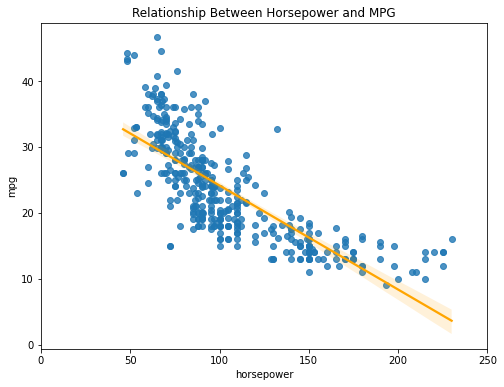

In [4]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

#### Answer: 

- The plot shows the relationship between the error and the slope of the model. The ideal slope looks to be around -0.158 because that is the minimum of the curve.


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

- It takes the starting point and chooses a direction based on the slope of the tangent line. Then, it takes a step in that direction, modulated by the learning rate of the gradient descent. After this, it recalculates the tangent slope and repeats, taking smaller and smaller steps as it closes in on the minimum of the curve.

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

#### Answer: 

- The learning rate is the size of the "steps" the gradient descent takes while moving down the curve. A higher learning rate will cause bigger steps, and one that is too big might slingshot too far. A lower learning rate takes tiny steps, and one that is too small might take a long time to find the minimum.


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

#### Answer: 

- Logistic regression models are used on categorical targets
- Log odds
- Linear regression predicts a continuous numeric variable
- Parametric model


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

#### Answer: 

- KNN
- Compared to KNN, a logistic regression is much faster to compute.
- However, a KNN model does not require a training phase.


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [5]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [6]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [7]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop('target', axis=1)
y = mpg_class['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

#### Part 1: explore the target column breakdown in train data

In [9]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- There is some class imbalance, with target = 0 making up about 75% of the data.


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- The model would always predict 0.


#### Part 3: How accurate would that baseline be on test data?


In [10]:
# Code to find the answer
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- Because it would always predict 0, the accuracy would follow the distribution of the target and would be 74.4%.


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

#### Answer:

- Because of the class imbalance, SMOTE might be one strategy to oversample the minority class.


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [11]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

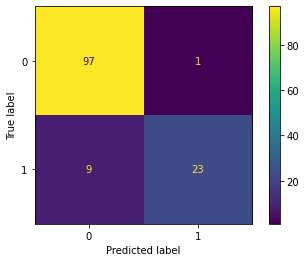

In [12]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test)

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [13]:
preds = logreg.predict(X_test_scaled)
# Accuracy
acc = accuracy_score(y_test, preds)
acc

0.9230769230769231

In [14]:
# Precision
prec = precision_score(y_test, preds)
prec

0.9583333333333334

In [15]:
# Recall
rec = recall_score(y_test, preds)
rec

0.71875

In [16]:
# F1-Score
f1_score(y_test, preds)

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [18]:
# Calculate roc-auc
probs = logreg.predict_proba(X_test_scaled)
probs = probs[:, 1]

roc_auc_score(y_test, probs)
print(roc_auc_score)

<function roc_auc_score at 0x0000018426184280>


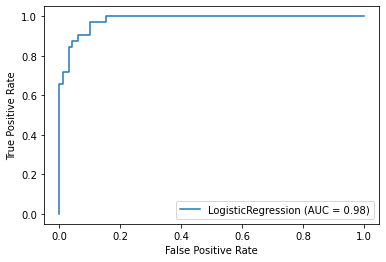

In [19]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

#### Answer:

- Overall the model is performing well. The recall is the weakest part, which could be an issue if false negatives are problematic for the stakeholder.


## Part 4: Decision Trees

### Set Up

Let's try a decision tree classifier. 

First, let's just have the tree split once, using just a single column. How would you set that up? Use random_state = 42.

In [21]:
# Create two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state=42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state=42)

# Train the two trees on different columns

# First fit dt_maxdepth1_v1 on 'weight', set it equal to dt_weight
dt_weight = dt_maxdepth1_v1.fit(X_train[['weight']], y_train)

# Then fit dt_maxdepth1_v2 on 'origin', set it equal to dt_origin
dt_origin = dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

#### Images:

Here we've created two images of what the nodes should look like.

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Just looking at the images, which of these trees does a better job splitting the data? How can you tell?

#### Answer:

- The first model using weight was more successful at splitting the data, because it produced groups with higher purity.


In [24]:
# If you want to check on your answer, let's try out just the default .score() for the models here.
print(dt_weight.score(X_test[['weight']], y_test))

print(dt_origin.score(X_test[['origin']], y_test))

0.9307692307692308
0.7538461538461538


### 13 bonus) What's the default scoring metric for the sklearn DecisionTreeClassifier? Is it always the best metric to use?

#### Answer:

- Default metric is the mean accuracy. It is a good starting point for any model, but in some situations the stakeholder will be more concerned with preventing false positives or negatives.

### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [25]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

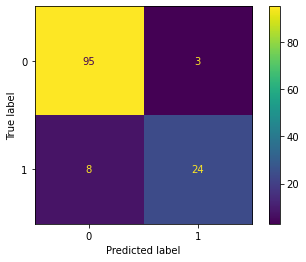

In [26]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test)

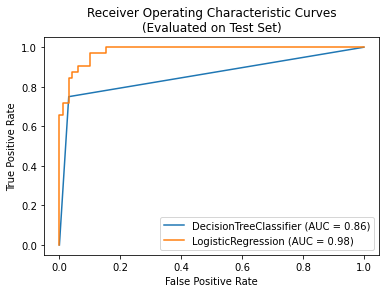

In [27]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

#### Answer:

- According the ROC_AUC, the logistic regression is the better model because the area under the curve is greater, which can be seen on the plot.
